In [95]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the data from boston.csv

df = pd.read_csv('boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Simple linear regression
We will use OLS (Ordinary Least Squares) method. **medv** will be the response and **lstate** will be the predictor

In [19]:
linear_model = sm.OLS.from_formula('medv ~ lstat', df)
results = linear_model.fit()

In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           5.08e-88
Time:                        19:26:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Now we will make some predictions using this model. We will set up a dataframe containing the values for which we want to predict

In [21]:
# 5, 10 and 15 are the values we want to use to predict
new = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns=['Intercept', 'lstat'])
new

,Intercept,lstat
0,1,5
1,1,10
2,1,15


In [22]:
results.predict(new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [27]:
def predict(result, new):
    
    # Get the predicted values
    fit = pd.DataFrame(result.predict(new), columns=['fit'])
    
    # Get the confidence interval for the model (and rename the columns to something a bit more useful)
    ci = result.conf_int().rename(columns={0: 'lower', 1: 'upper'})
    
    # Now a little bit of matrix multiplication to get the confidence intervals for the predictions
    ci = ci.T.dot(new.T).T
    
    # And finally wrap up the confidence intervals with the predicted values
    return pd.concat([fit, ci], axis=1)

In [28]:
predict(results, new)

,fit,lower,upper
0,29.803594,28.317716,31.289472
1,25.053347,23.186975,26.919720
2,20.303101,18.056234,22.549967


<h2>Plotting medv and lstat along with OLS using regplot from seaborn</h2>

(0.0, 65.0)

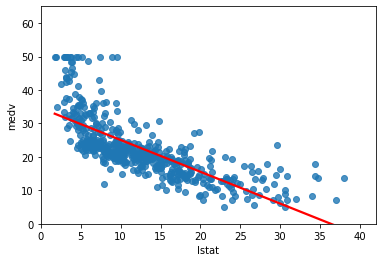

In [41]:
ax = sns.regplot(x='lstat',y='medv', data=df, line_kws={'color':'r'}, ci=None)
ax.set_xlim(0,42)
ax.set_ylim(0,65)

<h3>Plotting residuals against fitted values</h3>

In [55]:
#Creating a series of fitted values
fitted_values = pd.Series(results.fittedvalues, name="Fitted Values")
fitted_values

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Name: Fitted Values, Length: 506, dtype: float64

In [54]:
# creating a Series of residual values
residuals = pd.Series(results.resid, name='Residuals')
residuals

0      -5.822595
1      -4.270390
2       3.974858
3       1.639304
4       6.709922
         ...    
501    -2.966864
502    -5.327393
503    -5.295563
504    -6.397521
505   -15.167452
Name: Residuals, Length: 506, dtype: float64

<AxesSubplot:xlabel='Fitted Values', ylabel='Residuals'>

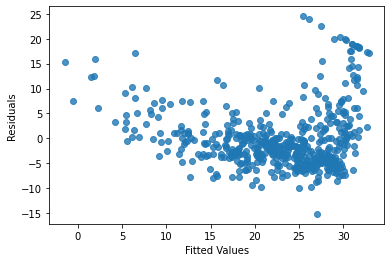

In [59]:
# ploting fitted values vs the residuals
sns.regplot(x=fitted_values, y=residuals, fit_reg=False)

On the basis of the residual plot, there is some evidence of non-linearity. Let us use multiple linear regression to fit this model.

# Multiple linear regression

In [62]:
# Do 2 regressors
multi_lm = sm.OLS.from_formula('medv ~ lstat + age', df)
multi_lm_result = multi_lm.fit()
print(multi_lm_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           2.98e-88
Time:                        19:59:17   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [65]:
# Do all predictors
multi_lm = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv'])), df)
multi_lm_results = multi_lm.fit()
print(multi_lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          6.72e-135
Time:                        20:09:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

**Age** and **indus** have high p-values, so we should remove them from the model

In [66]:
# Do all predictors
multi_lm = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv','age','indus'])), df)
multi_lm_results = multi_lm.fit()
print(multi_lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          5.54e-137
Time:                        20:11:54   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

In [69]:
multi_lm_results.mse_total

84.58672359409856

# Non-linear Transformations of the Predictors
We can accomodate non-linear transformations of the predictors

In [74]:
lm_fit2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', df).fit()
print(lm_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          1.56e-112
Time:                        21:55:02   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

**Results**- near zero p-value associated with the quadratic term suggests that it leads to an improved model!

Will now use the ANOVA function to quantify to which the quadratic fit is superior to the linear fit

**ANOVA** is analysis of variance. Will use ANOVA to determine the influence that independent variables have on the dependent variable in for the 2 different models

In [76]:
# creating a linear model
lm_fit = sm.OLS.from_formula('medv ~ lstat', df).fit()

#printing the result of the ANOVA test
print(sm.stats.anova_lm(lm_fit,lm_fit2))

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


The ANOVA function has peformed a hypothesis test comparing the two models.

Null is that the 2 models fit the data equally well. Alternative is that the full model is superior. The F-stat is large with a small p-value, which suggest that the 2nd quadratic model is more superior.

Since predictored squared did better, let us see how predictor cubed etc will peform
# Fifth order polynomial fit

In [98]:
print(sm.OLS.from_formula('medv ~ ' + '+'.join(['np.power(lstat,' + str(i) + ')' for i in range(1,6)]),df).fit().summary())


ERROR! Session/line number was not unique in database. History logging moved to new session 31
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 28 Nov 2021   Prob (F-statistic):          8.73e-122
Time:                        23:00:59   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

# Log transformation

In [101]:
print(sm.OLS.from_formula('medv ~ np.log(rm)', df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           1.22e-64
Time:                        23:02:46   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0